# Spotify 1 Million Tracks - Exploração de Dados

### Descrição

This dataset was extracted from the Spotify platform using the Python library "Spotipy", which allows users to access music data provided via APIs. The dataset collected includes about 1 Million tracks with 19 features between 2000 and 2023. Also, there is a total of 61,445 unique artists and 82 genres in the data. Its significance lies in its potential to unravel patterns and predict song popularity prior to its release. 

### Os Dados

///// Falta incluir mais features

Audio Features:

- **Popularity** - popularidade da música (0 a 100);
- **Year** - ano de lançamento (2000 até 2023);
- **Danceability** - se a música é adequada para dançar (0.0 a 1.0);
- **Energy** - uma medição perceptual da intensidade e atividade da música (0.0 a 1.0);
- **Key** - a tonalidade da música (-1 a 11): -1 no key detected;
- **Loudness** - intensidade da música em decibeis (-60 até 0 dB);
- **Mode** - modalidade da música (0 - Menor ou 1 - Maior);
- **Speechiness** - a presença de fala na música;
- **Acousticness** - medida de confiança (0 a 1) em saber se a música é acústica;
- **Instrumentalness** - se a música contém vocais (0 a 1);
- **Liveness** - presença de público na gravação da música (0 a 1);
- **Valence** - positividade musical (0 a 1);
- **Tempo** - o tempo da música em batimentos por minuto(BPM);
- **Time_signature** - assinatura do tempo de uma música (3 a 7);
- **Duration_ms** - duração em milissegundos.

## Importar bibliotecas

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from scipy import stats
%matplotlib inline

# Para visualizar os valores com cinco casas decimais
# pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Compreender os dados

Carregar o dataset

In [91]:
data = pd.read_csv('dataset/data.csv')

Visualizar features do problema

In [92]:
data.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

Informações sobre valores nulos e tipos de dados de cada coluna

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

Analyse distinct values for 'track_id' and 'Unnamed: 0' fields

In [94]:
data["id"].value_counts()
data.drop("id", axis=1, inplace=True)

Since, they are different for each entry, we can remove those columns
We are not interested in the data analysis of those columns

Apresentação de valores médios, quartis, mediana, mínimo, máximo, etc de cada coluna

In [95]:
data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


Apresentação dos primeiros registos do dataset

In [96]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


Apresentação dos últimos registos do dataset

In [97]:
data.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.443,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.306,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.385,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.270,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.539,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.153,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.761,0,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.472,2020
169908,0.1090,['Ingrid Andress'],0.512,214787,0.428,0,0.000000,0,0.1050,-7.387,1,More Hearts Than Mine,65,2020-03-27,0.0271,80.588,0.366,2020


Focar em estatísticas do target do problema (a popularidade)

In [98]:
data['popularity'].describe().apply("{0:.2f}".format)

count    169909.00
mean         31.56
std          21.58
min           0.00
25%          12.00
50%          33.00
75%          48.00
max         100.00
Name: popularity, dtype: object

Podemos concluir que os valores para esta feature não estão bem distribuídos. Apesar de variar entre 0 e 100, metade dos valores são inferiores a 15, o que mostra que a maioria das popularidades medidas está próxima de 0.

Vamos então entender melhor a distribuição das popularidades, recorrendo a um histograma

<Axes: >

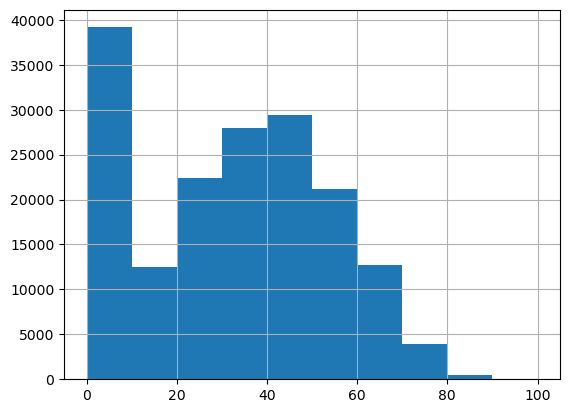

In [99]:
data['popularity'].hist()

In [100]:
data[data['popularity'] == 0]

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
5,0.995,"['Felix Mendelssohn', 'Vladimir Horowitz']",0.424,352600,0.1200,0,0.911000,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,1928,0.0593,63.521,0.2660,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169822,0.217,['Don Omar'],0.741,255680,0.7870,0,0.017900,5,0.0835,-6.228,1,Pobre Diabla,0,2020-06-05,0.0525,91.993,0.7710,2020
169825,0.913,['ROSALÍA'],0.698,253109,0.2900,0,0.000021,4,0.0950,-6.899,0,Aunque Es De Noche,0,2020-06-05,0.0510,137.949,0.3980,2020
169826,0.921,['ROSALÍA'],0.442,214012,0.2670,0,0.000017,6,0.1210,-9.640,0,Catalina,0,2020-06-05,0.0582,78.171,0.3220,2020
169849,0.262,['Ellie Goulding'],0.453,148689,0.3160,0,0.000894,0,0.1350,-8.525,1,How Long Will I Love You,0,2020-06-05,0.0316,125.628,0.1770,2020


Entender quais são as músicas mais populares e as menos populares

In [101]:
data.sort_values(by=['popularity'], ascending=False)

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87942,0.00146,['The Weeknd'],0.514,200040,0.73000,0,0.000095,1,0.0897,-5.934,1,Blinding Lights,100,2020-03-20,0.0598,171.005,0.334,2020
87940,0.24700,"['DaBaby', 'Roddy Ricch']",0.746,181733,0.69000,1,0.000000,11,0.1010,-7.956,1,ROCKSTAR (feat. Roddy Ricch),99,2020-04-17,0.1640,89.977,0.497,2020
87949,0.73100,"['Powfu', 'beabadoobee']",0.726,173333,0.43100,0,0.000000,8,0.6960,-8.765,0,death bed (coffee for your head) (feat. beabad...,97,2020-02-08,0.1350,144.026,0.348,2020
87941,0.23300,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",0.716,165978,0.53700,1,0.000000,0,0.1570,-7.648,0,THE SCOTTS,96,2020-04-24,0.0514,129.979,0.280,2020
87852,0.06860,"['Surf Mesa', 'Emilee']",0.674,176547,0.77400,0,0.001880,11,0.3930,-7.567,0,ily (i love you baby) (feat. Emilee),95,2019-11-26,0.0892,112.050,0.330,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145185,0.99500,"['Leela Chitnis', 'Arun Kumar']",0.682,200870,0.06800,0,0.120000,4,0.1260,-12.267,0,Nadiya Ke Tat Pe Khadi Hoon,0,1941-12-31,0.3020,74.537,0.872,1941
145183,0.80400,['Ravi'],0.400,200027,0.38000,0,0.700000,3,0.1920,-12.655,1,Main Hoon Majboor,0,1941-12-01,0.0340,158.558,0.490,1941
145181,0.99500,"['Ibrahim Özgür', 'Park Otel Orkestrası']",0.379,189015,0.08830,0,0.920000,2,0.1290,-19.572,0,Kalbimde Hiç Yerin Kalmadı,0,1941-01-01,0.0703,64.766,0.514,1941
145179,0.99200,"['Ludwig van Beethoven', 'Claudio Arrau']",0.307,68067,0.00757,0,0.760000,3,0.1350,-28.996,1,"Variations and Fugue in E-Flat Major, Op. 35 ""...",0,1941,0.0430,137.694,0.207,1941


As 5 músicas mais populares são recentes (2022 e 2023), enquanto que as 5 músicas menos populares são anteriores a 2010

Vamos também analisar quais os artistias mais populares

In [102]:
#groups_artist_name = data.groupby(by=['track_artist']).agg({'tempo':'count', 'track_popularity':'mean'}).rename(columns={'tempo':'count'}).reset_index().sort_values(by=['track_popularity'], ascending=False)
#groups_artist_name[groups_artist_name['count'] > 12] # Only show artists with more than N songs

... e quais os artistas com mais músicas

In [103]:
#data['track_artist'].value_counts()

Vamos também analisar as tendências em cada ano

<Axes: >

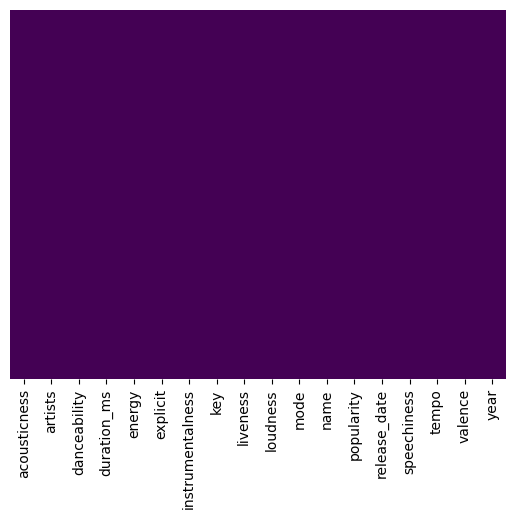

In [104]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [105]:
data["release_date"].tail()

169904    2020-05-15
169905    2020-06-08
169906    2020-05-29
169907    2020-02-28
169908    2020-03-27
Name: release_date, dtype: object

In [106]:
import re

data_copy = data.copy()
data_copy["release_date"] = pd.to_datetime(data["release_date"], format='%Y-%m-%d', errors='coerce')

for index, row in data_copy.iterrows():
    if pd.isna(row['release_date']):
        original_value = data.loc[index, 'release_date']
        pattern = r'(\d{4})(-(\d{2}))?'
        match = re.search(pattern, original_value)
        if match:
            year = match.group(1)
            month = match.group(3) if match.group(3) else '01'  # se missing, assume 01
            day = '01' # se missing, assume 01
            new_date = year + '-' + month + '-' + day
            data_copy.loc[index, 'release_date'] = new_date       


In [107]:
assert data_copy["release_date"].isnull().sum() == 0, 'missing date'

In [108]:
data_copy["release_date_year"] = data_copy["release_date"].dt.year
data_copy["release_date_month"] = data_copy["release_date"].dt.month
data_copy["release_date_day"] = data_copy["release_date"].dt.day
data_copy.drop(columns=['release_date'], inplace=True)
data = data_copy.copy()
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,release_date_year,release_date_month,release_date_day
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928,1928,1,1
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928,1928,1,1
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928,1928,1,1
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928,1928,9,25
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928,1928,1,1


Algumas conclusões interessantes:

- quanto mais próximas do atual, maior é a popularidade da música, excetuando o último ano (2023);

- as músicas tem-se tornado mais enérgicas;

- e têm perdido acústica e valência;

- têm ficado mais curtas;

In [109]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,release_date_year,release_date_month,release_date_day
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928,1928,1,1
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928,1928,1,1
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928,1928,1,1
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928,1928,9,25
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928,1928,1,1


Vamos verificar se os anos de lançamento das músicas estão bem distribuídos

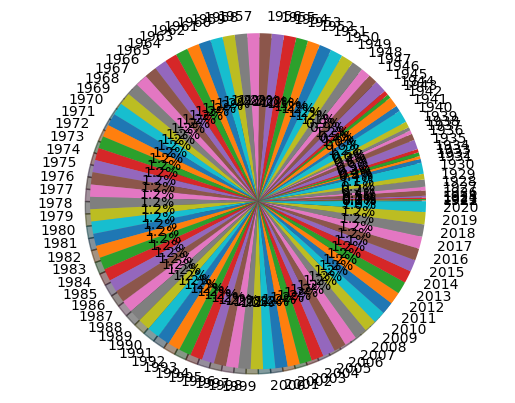

In [110]:
labels = data['release_date_year'].astype('category').cat.categories.tolist()
counts = data['release_date_year'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

Verificamos que sim

Vamos agora realizar uma análise dos dados das músicas agrupadas por género

Tal como era expectável, o pop é o género mais popular, em termos médios

Vamos também analisar qual a time_signature mais popular

## Missing Values

Vamos verificar a existência de missing values

Como podemos ver, não há missing values no nosso dataset.

## Correlações

First, we need to convert categorical variables to numerical, using label encoding

In [111]:
# le = preprocessing.LabelEncoder()
# data_categorical_encoded = data.copy()
# data_categorical_encoded.drop(columns=['track_id', 'track_album_id', 'playlist_id'], inplace=True)

# data_categorical_encoded['playlist_genre'] = le.fit_transform(data['playlist_genre'])
# data_categorical_encoded['playlist_subgenre']= le.fit_transform(data['playlist_subgenre'])
# data_categorical_encoded['track_album_name']= le.fit_transform(data['track_album_name'])
# data_categorical_encoded['playlist_name']= le.fit_transform(data['playlist_name'])
# data_categorical_encoded['track_name']= le.fit_transform(data['track_name'])
# data_categorical_encoded['track_artist']= le.fit_transform(data['track_artist'])

# data_categorical_encoded.head()

In [112]:
data = data[data["popularity"] != 0]

### Correlação de pearson

<Axes: >

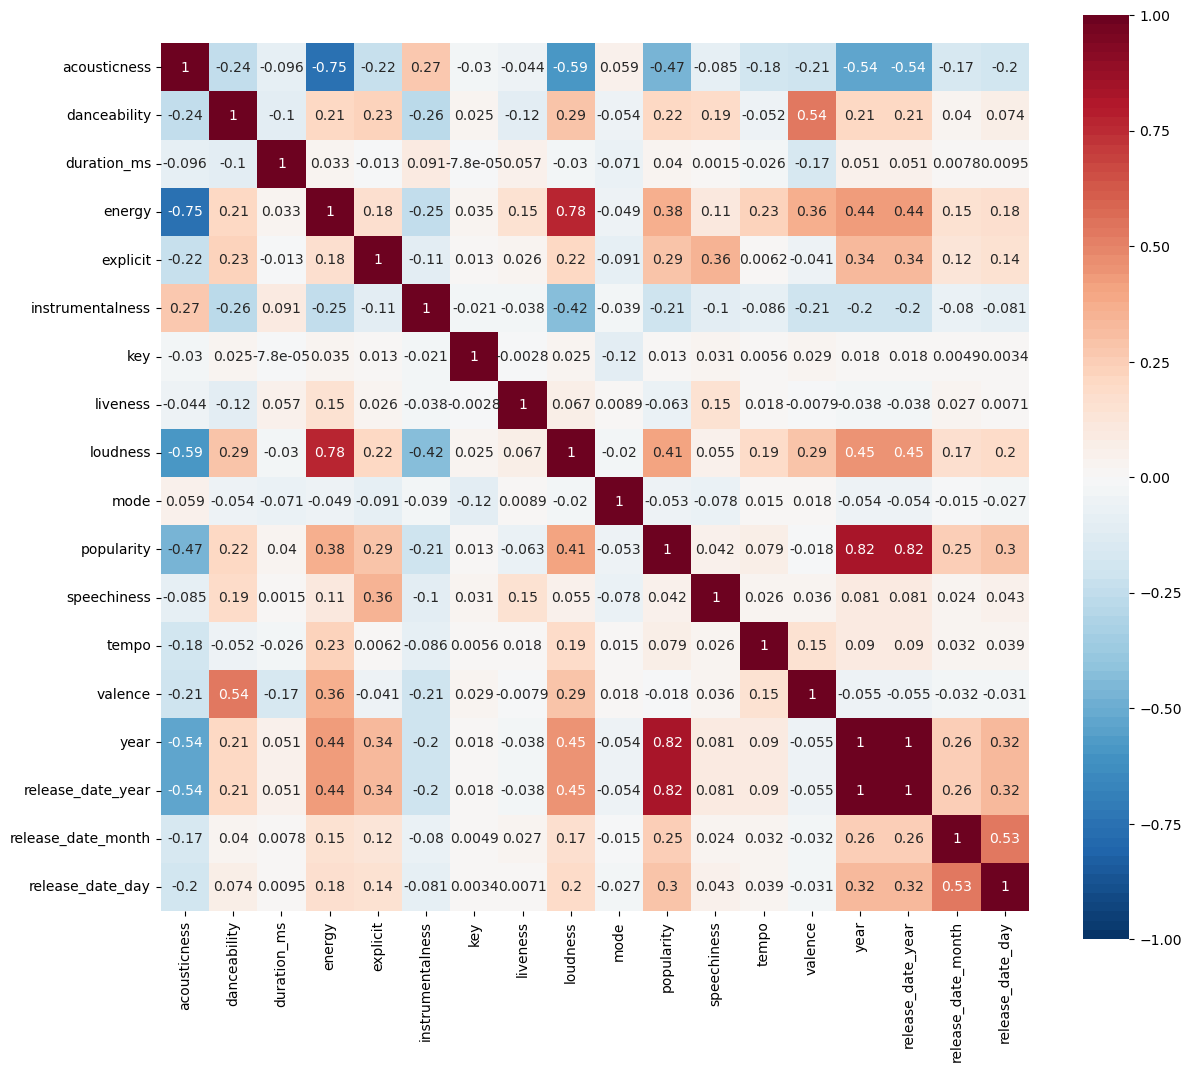

In [113]:
corr_matrix = data.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, cmap=sns.color_palette("RdBu_r", 100))

### Correlação de Spearman

<Axes: >

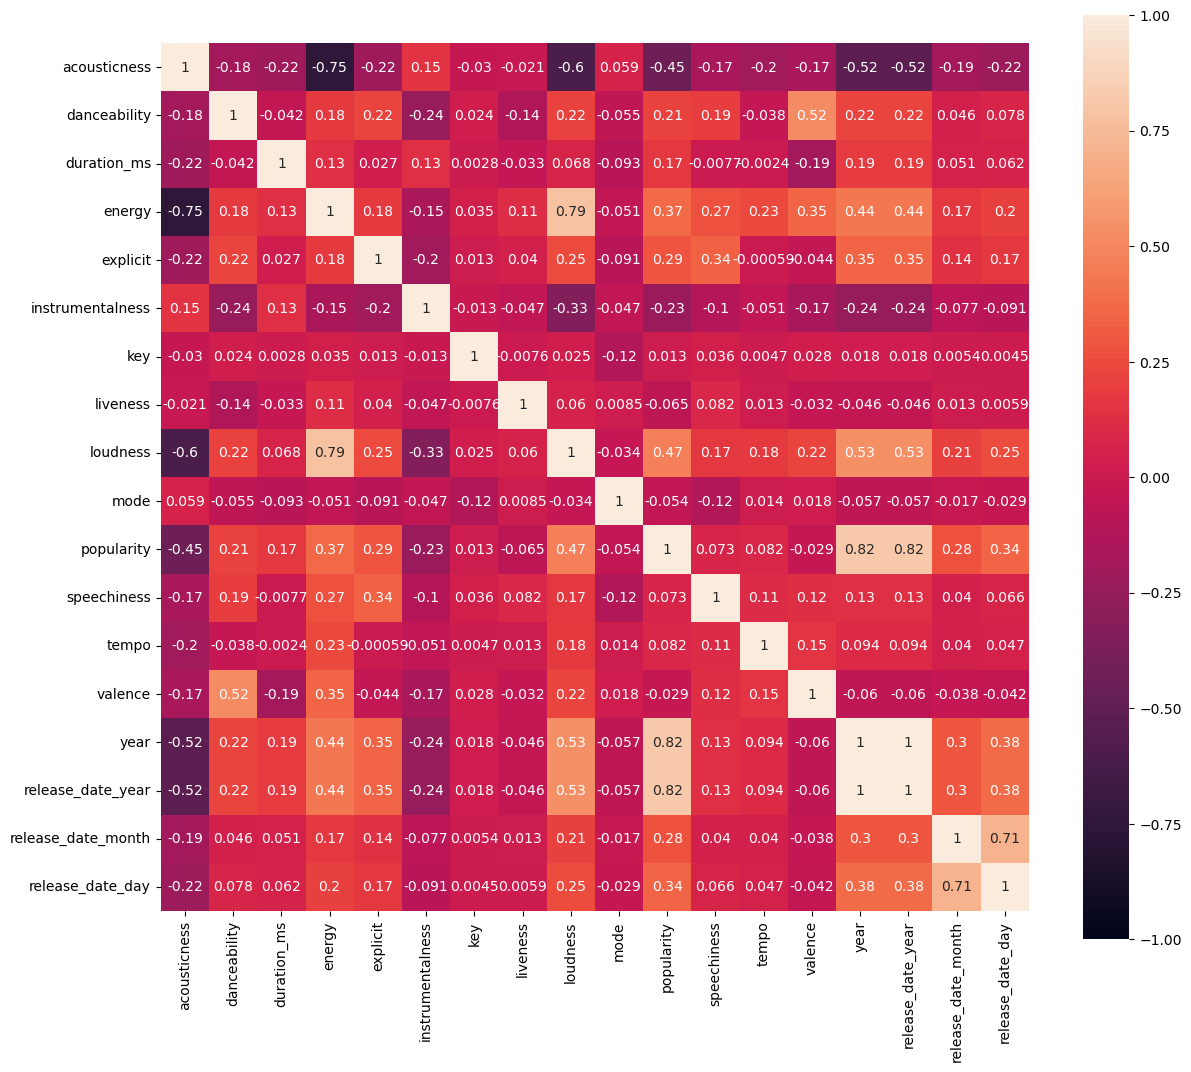

In [114]:
corr_matrix = data.corr(method='spearman', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

### Correlação de Kendall

<Axes: >

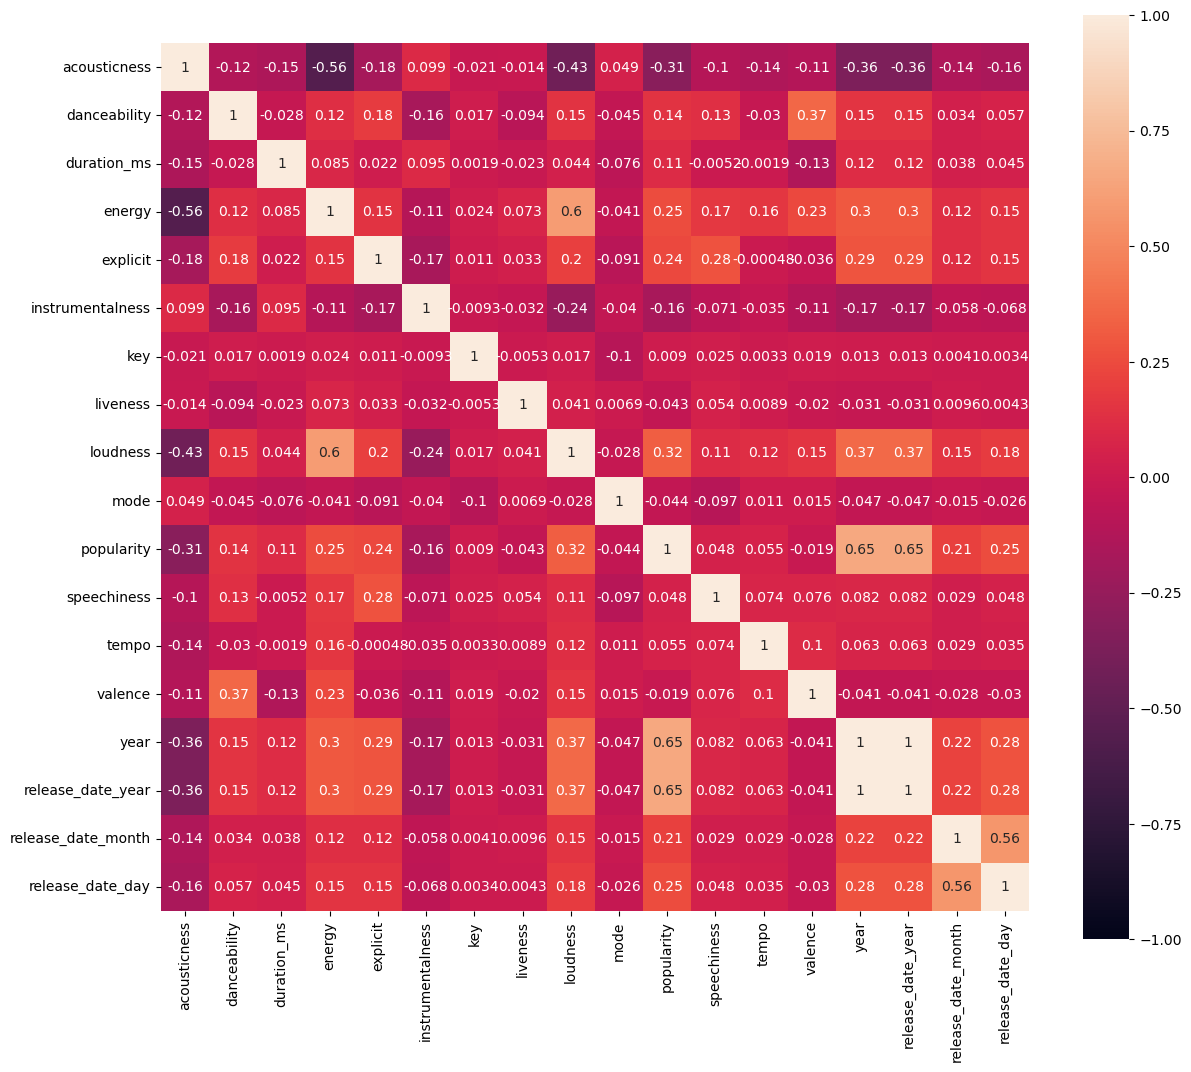

In [115]:
corr_matrix = data.corr(method='kendall', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

Das 3 correlações analisadas podemos ver que as features com maior correlação com a popularidade são:

- year (0.25);

- loudness (0.1);

- instrumentalness (-0.15);

- duration_ms (-0.12);

Podemos também visualizar a distribuição dos dados coluna vs coluna

In [116]:
# muito demorado
# sns.pairplot(data, hue='popularity')

In [117]:
X = data.drop(['popularity','artists', 'name'], axis=1)
y = data['popularity']
print(X)
print(y)

        acousticness  danceability  duration_ms  energy  explicit  \
4             0.9900         0.210       687733  0.2040         0   
11            0.9890         0.170        85133  0.0823         0   
40            0.9770         0.305       215267  0.0830         0   
42            0.9900         0.337       333907  0.0699         0   
47            0.9850         0.355       138013  0.0452         0   
...              ...           ...          ...     ...       ...   
169904        0.1730         0.875       163800  0.4430         1   
169905        0.0167         0.719       167468  0.3850         0   
169906        0.5380         0.514       180700  0.5390         0   
169907        0.0714         0.646       167308  0.7610         0   
169908        0.1090         0.512       214787  0.4280         0   

        instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
4               0.908000   11    0.0980   -16.829     1       0.0424   62.149   
11       

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [119]:
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [120]:
predictions = lm.predict(X_test)

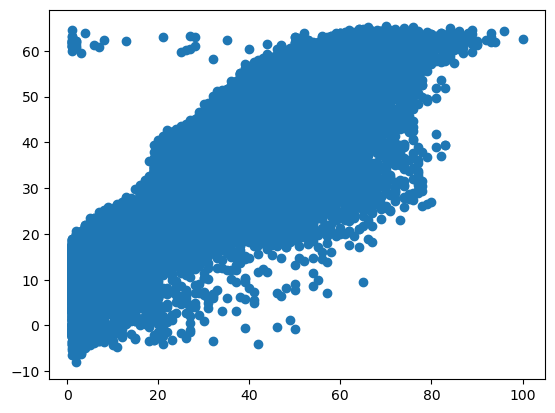

In [121]:
plt.scatter(y_test, predictions)

<Axes: ylabel='Count'>

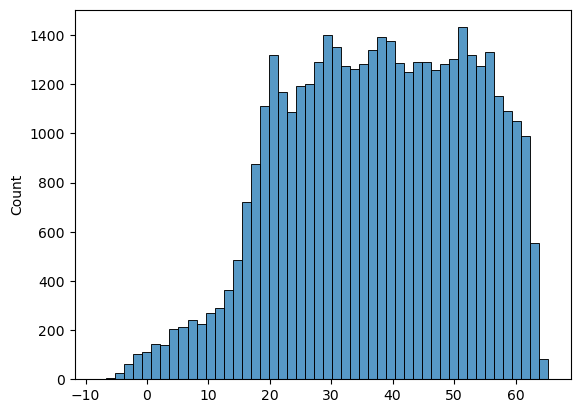

In [122]:
sns.histplot(predictions, bins=50)

<Axes: xlabel='popularity', ylabel='Count'>

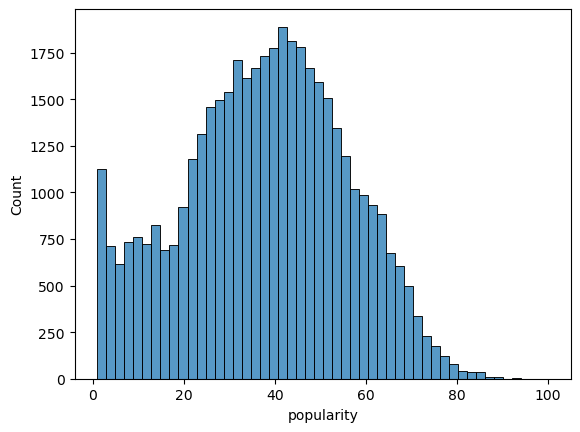

In [123]:
sns.histplot(y_test, bins=50)

In [124]:
predictions.max()

65.32676304882784

In [125]:
pd.merge(pd.DataFrame(y_test), pd.DataFrame(predictions), left_index=True, right_index=True)    

,popularity,0
39628,61,24.515997
12121,34,61.565694
35415,32,57.930672
4858,30,39.442566
1636,7,31.425266
...,...,...
27494,29,53.614883
26147,11,24.189282
22974,47,46.059056
3085,36,28.841090


In [126]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.90068021470737
MSE: 103.13099314002012
RMSE: 10.155343083324173


## Multivariate analysis

Vamos verificar a distribuição da popularidade pelo género

<Axes: >

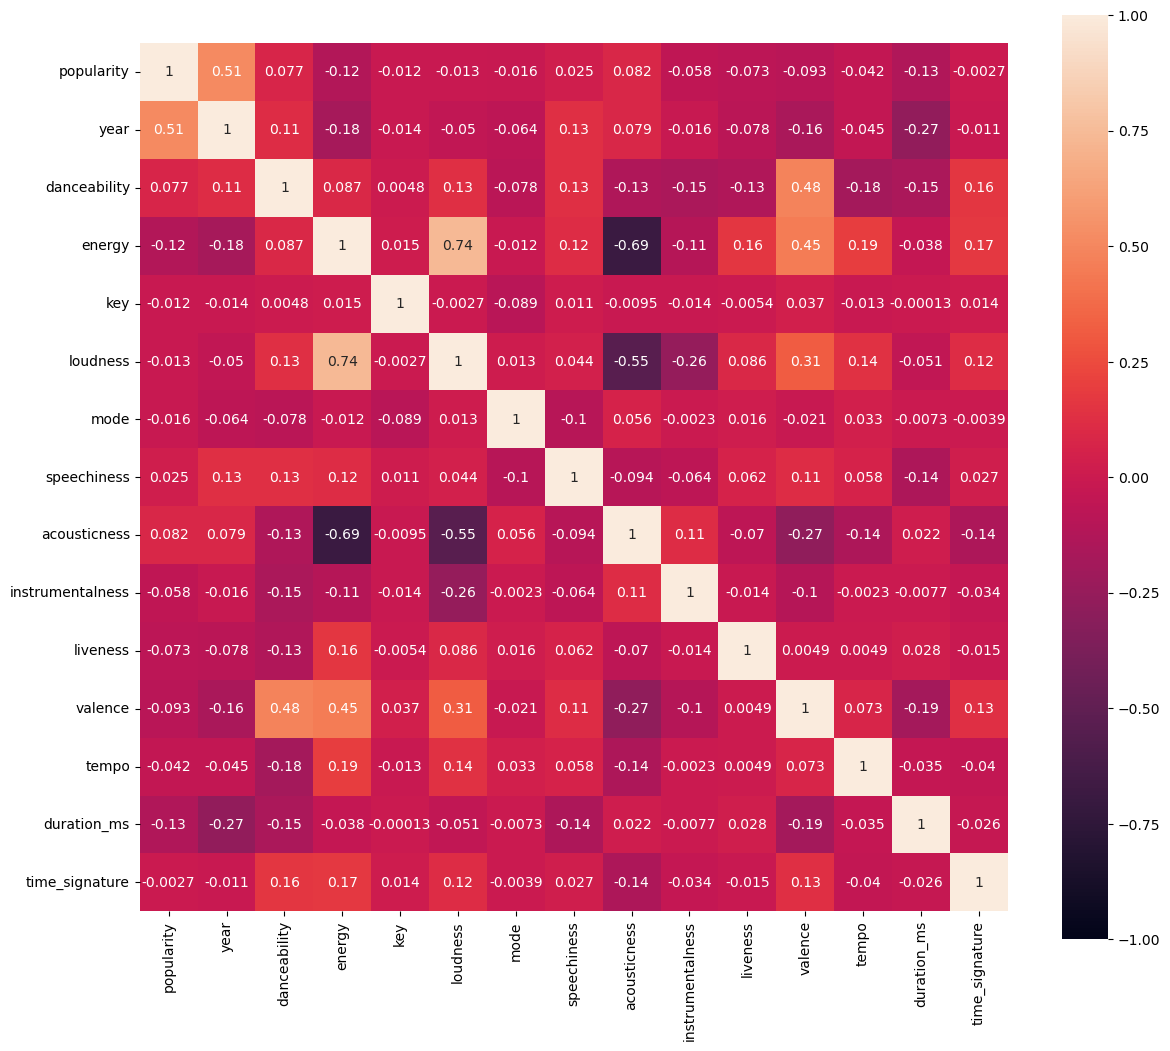

In [ ]:
# Pearson Method
corr_matrix = data_pop.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

Verificamos que para o género pop, a energia da música tem um fator mais preponderante na sua popularidade

In [ ]:
data_gospel = data.copy()
data_gospel = data_gospel[data_gospel['genre'] == 'gospel']
data_gospel.head()

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
25284,Tamela Mann,Take Me to the King (feat. Kirk Franklin),52,2012,gospel,0.461,0.413,6,-6.914,1,0.0327,0.1970,0.000002,0.312,0.351,115.568,287573,4
25285,Amber Bullock,Lord You've Been So Good,45,2012,gospel,0.390,0.654,0,-3.613,1,0.2910,0.0288,0.000000,0.123,0.873,182.979,213620,4
25286,Anthony Brown & group therAPy,Testimony,44,2012,gospel,0.630,0.900,2,-5.548,1,0.2320,0.1060,0.000000,0.331,0.769,165.923,257093,4
25287,Marvin Winans,Draw Me Close/Thy Will Be Done,44,2012,gospel,0.508,0.304,1,-11.672,1,0.0337,0.7770,0.000000,0.178,0.154,102.739,385985,4
25288,Jonathan McReynolds,No Gray,46,2012,gospel,0.570,0.459,3,-7.494,1,0.1100,0.6810,0.000000,0.108,0.691,78.803,250078,4


<Axes: >

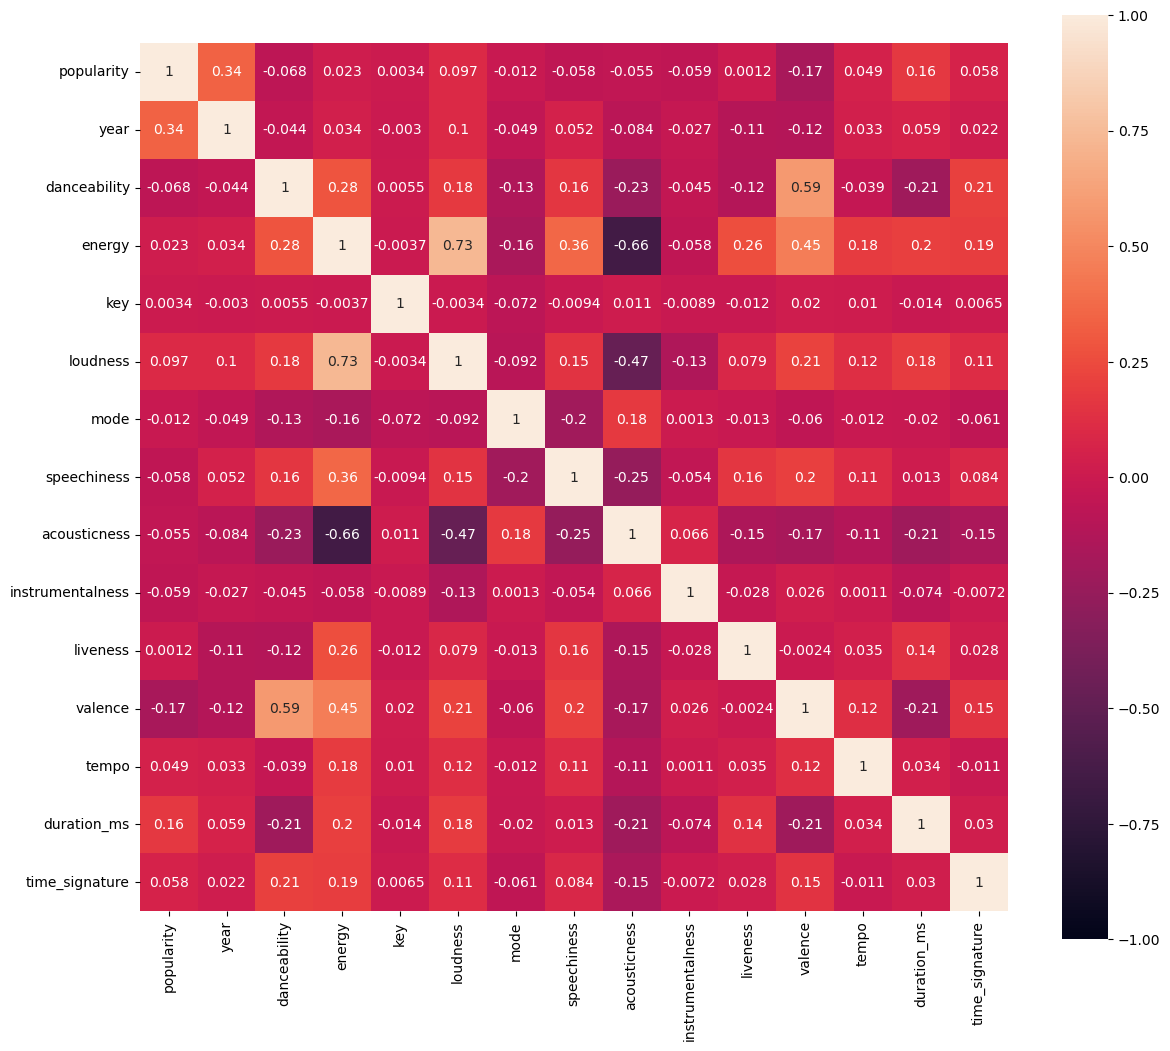

In [ ]:
# Pearson Method
corr_matrix = data_gospel.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

Já para a música gospel, a feature 'valence' passa a ter uma maior correlação com a popularidade

In [ ]:
data_rock = data.copy()
data_rock = data_rock[data_rock['genre'] == 'metal']
data_rock.head()

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
36378,Linkin Park,BURN IT DOWN,74,2012,metal,0.585,0.972,9,-4.450,0,0.0534,0.01430,0.000000,0.0707,0.585,110.006,230253,4
36379,Halestorm,I Miss the Misery,62,2012,metal,0.469,0.969,0,-2.219,1,0.0589,0.00900,0.000011,0.3460,0.476,164.042,183507,4
36380,Linkin Park,CASTLE OF GLASS,73,2012,metal,0.615,0.911,1,-3.584,0,0.0278,0.06860,0.001880,0.0908,0.685,108.000,205400,4
36381,Shinedown,Enemies,63,2012,metal,0.507,0.966,1,-2.635,1,0.0460,0.00159,0.000000,0.3360,0.502,136.035,188093,4
36382,In This Moment,Whore,63,2012,metal,0.604,0.883,11,-3.821,0,0.0470,0.02540,0.000000,0.0813,0.544,90.001,245533,4


<Axes: >

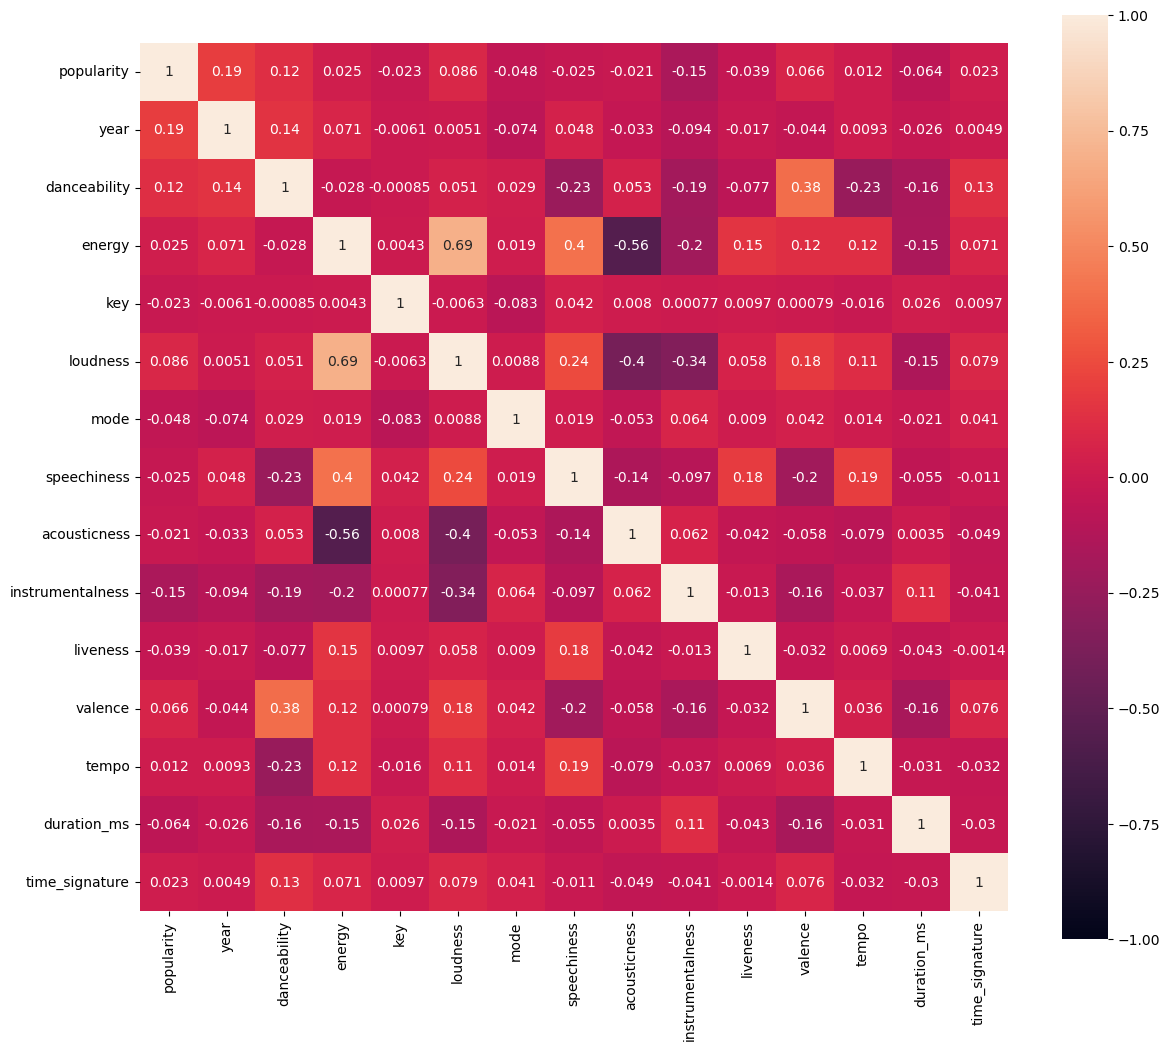

In [ ]:
# Pearson Method
corr_matrix = data_rock.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

Podemos concluir que, para diferentes géneros, a popularidade da música depende de diferentes fatores